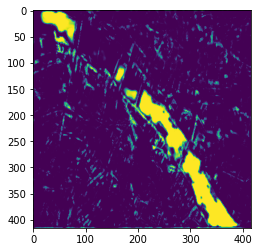

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import sys
import os

from vgg_unet import VggUnet


def process(images_fps):

    image_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
            ])
    
    image = cv2.imread(images_fps)
    image = cv2.resize(image, (416, 416), interpolation = cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image_transform(image)

    return image


def reverse_transform(inp):
   
    inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
    ) 

    #print(inp.shape)
    inp = inv_normalize(inp)
    inp = inp.numpy()
    inp = np.swapaxes(inp, 1, 3)
    inp = np.swapaxes(inp, 1, 2)
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp


def labels2mask(labels):
    return labels[:,1,:,:]


model = VggUnet()
model.load_state_dict(torch.load("state_dict.pth", map_location="cpu"))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


from pathlib import Path

#tem = r"C:\Users\Moad\Documents\MSc Project\Code\test.jpeg"
#tem = tem.replace('\\','/')
#print(tem)
#dataset_dirl = os.path.normpath(tem)

#=("C:\Users\Moad\Documents\MSc Project\Code\test.jpeg")
#image_dir_temp = Path(sys.argv[1])
#image_dir = ("C:\Users\Moad\Documents\MSc Project\Code\test.jpeg")
image_dir = "C://Users//Moad//Documents//MSc Project//Code//test.jpeg"
#print(image_dir)

p_image = process(image_dir)
p_image = p_image.reshape(1,3,416,416)
#print(p_image.shape)    

p_image = p_image.to(device)

pred = model(p_image)
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
p_image = p_image.data.cpu()

# dataloader return normalized input image, so we have to denormalize before viewing
input_images = reverse_transform(p_image)
# target and predict mask are single channel, so squeeze

pred = labels2mask(pred)


#fig, axs = plt.subplots(1, 1, figsize=(30,30))
#cv2.imshow(np.squeeze("Segmented River",pred))


plt.imshow(np.squeeze(pred))



    


In [75]:
import numpy as np
import cv2
#import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import sys
import os


from vgg_unet import VggUnet


def process(images_fps):

    image_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
            ])
    
    image = cv2.imread(images_fps)
    image = cv2.resize(image, (416, 416), interpolation = cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image_transform(image)

    return image



def reverse_transform(inp):
   
    inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
    ) 

     #print(inp.shape)
    inp = inv_normalize(inp)
    inp = inp.numpy()
    inp = np.swapaxes(inp, 1, 3)
    inp = np.swapaxes(inp, 1, 2)
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

def labels2mask(labels):
    return labels[:,1,:,:]
 

model = VggUnet()
model.load_state_dict(torch.load("state_dict.pth", map_location="cpu"))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

image_dir = os.path.normpath( "C://Users//Moad//Documents//MSc Project//Code//test.jpeg")



In [58]:
im_color.shape

(416, 416, 3)

In [59]:
im_color.dtype

dtype('uint8')

In [60]:
cv2.imshow("window_name", im_color)
